# Test Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '../dataset/02_raw_cleaned/printlog_cleaned.csv'
df = pd.read_csv(path)


In [2]:
df.head()

,user_id,department,type,filename,datetime,ip,color,page,copy,paper_size,result,file_ext_fromend,date,year,month,day,hour,weeknum,working_day
0,ys04,analyst,PRINT,C:\Users\yslee\Downloads\(서식) 계정신청서_개인.pdf,2019-05-28 17:43:18,172.16.11.41,bnw,1,1,A3,completed,pdf,2019-05-28,2019,5,28,17,1,working_day
1,ys04,analyst,PRINT,C:\Users\yslee\Downloads\(서식) 계정신청서_개인.pdf,2019-05-28 17:43:20,172.16.11.41,bnw,1,1,A3,completed,pdf,2019-05-28,2019,5,28,17,1,working_day
2,ys04,analyst,PRINT,C:\Users\yslee\Downloads\(서식) 정보보호서약서_개인.pdf,2019-05-28 17:43:24,172.16.11.41,bnw,2,1,A5,completed,pdf,2019-05-28,2019,5,28,17,1,working_day
3,ys04,analyst,PRINT,C:\Users\yslee\Downloads\(서식) 정보보호서약서_대표자.pdf,2019-05-28 17:43:28,172.16.11.41,bnw,2,1,A3,completed,pdf,2019-05-28,2019,5,28,17,1,working_day
4,ys04,analyst,PRINT,C:\Users\yslee\Downloads\(서식) 정보보호서약서_개인.pdf,2019-05-28 17:53:41,172.16.11.41,bnw,2,1,A4,completed,pdf,2019-05-28,2019,5,28,17,1,working_day


## Import Styles

In [3]:
# sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=2, color_codes=True, rc=None)

In [4]:
# import yaml

# with open('YAML_FILE.yaml') as _yml:
#     conf = _yml.load(file, Loader=yaml.BaseLoader)

## 1. Single Continous - Histogram

In [5]:
import matplotlib.pylab as pylab
params = {'figure.figsize': (15, 5),
          'font.size': 12,
          'axes.titlesize':'x-large',
          'legend.loc': 'best',
          
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
          }
pylab.rcParams.update(params)

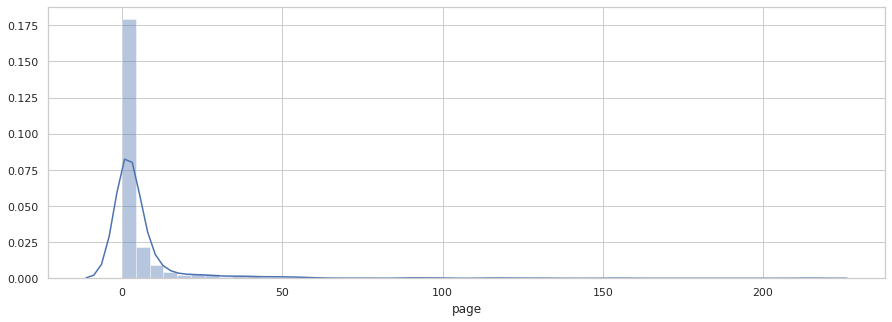

In [6]:
from histogram import sns_hist

fig, ax = plt.subplots()
sns_hist(df['page'], bins=50, kde=True, hist_kws={"log":False})

#customizing
# ax.set(xlabel="change x_label", ylabel="change y_label", title="change title", 
#        xlim=(0, 40))

- Example: Histogram Subplots

In [7]:
import matplotlib.pylab as pylab
params = {'figure.figsize': (15, 5),
          'font.size': 12,
          'axes.titlesize':'x-large',
          'legend.loc': 'best',
          
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
          }
pylab.rcParams.update(params)

[Text(0, 0.5, 'change y_label'), (0, 100), Text(0.5, 0, 'change x_label')]

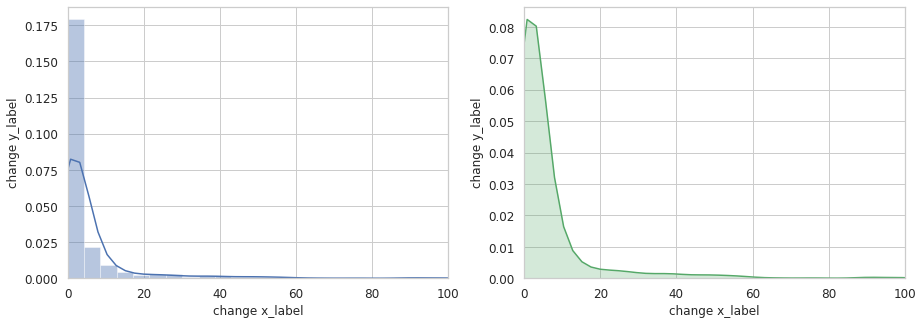

In [8]:
from histogram import sns_hist
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False)

sns_hist(df['page'], bins=50, kde=True,
        hist_kws={"log":False},
        ax=ax0)

sns_hist(df['page'], hist=False,
        hist_kws={"log":False},
        kde_kws={"color":"g", 'shade': True}, ax=ax1)

ax0.set(xlabel="change x_label", ylabel="change y_label", xlim=(0, 100))
ax1.set(xlabel="change x_label", ylabel="change y_label", xlim=(0, 100))

## 2. Single Continous - Boxplot

In [9]:
import matplotlib.pylab as pylab
params = {'figure.figsize': (15, 5),
          'font.size': 12,
          'axes.titlesize':'x-large',
          'legend.loc': 'best',
          
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
          }
pylab.rcParams.update(params)

[(-10, 40)]

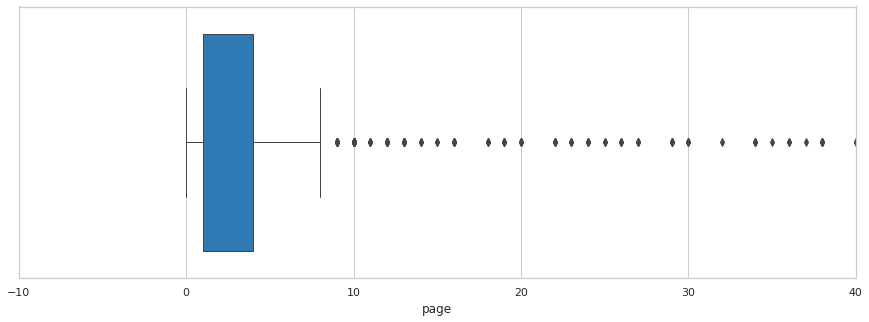

In [10]:
from boxplot import sns_boxplot 

# mnc_palette = ["#0F5BA3", "#3787C0", "#6AADD5", "#ABCFE5", "#D6E5F4"]
fig, ax = plt.subplots()
sns_boxplot('page', data=df, ax=ax)
ax.set(xlim=(-10,40))

[(0, 40), Text(0.5, 1.0, 'Two Variable Boxplot')]

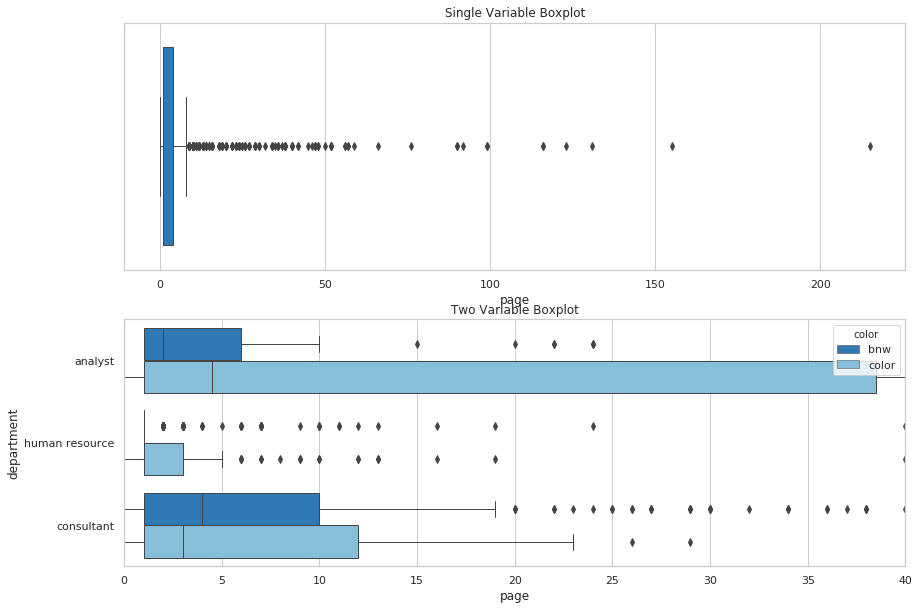

In [11]:
from boxplot import sns_boxplot 
fig, (ax0,ax1) = plt.subplots(figsize=(14,10), nrows=2)

# mnc_palette = ["#0F5BA3", "#3787C0", "#6AADD5", "#ABCFE5", "#D6E5F4"]
sns_boxplot(x='page', data=df, ax=ax0)
sns_boxplot(x='page', y='department', data=df, hue='color', ax=ax1, whis=True)

# customizing
ax0.set(title="Single Variable Boxplot")
ax1.set(title="Two Variable Boxplot", xlim=(0, 40))

## 3. Single Categorical- Countplot

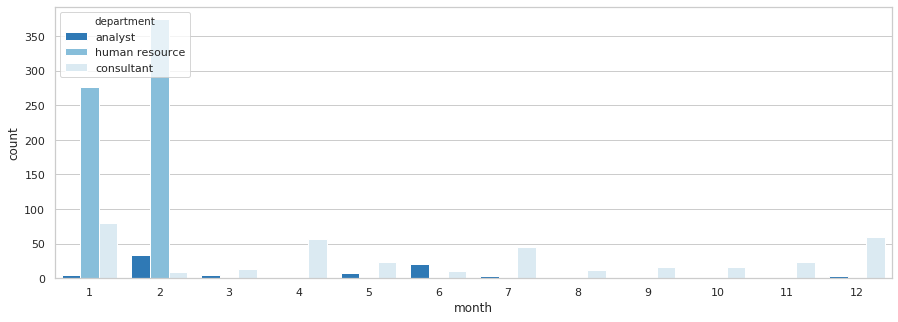

In [12]:
from countplot import sns_countplot

sns_countplot("month", df, hue='department')

## 4. Scatter_Line Plot with Relplot

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:1656: UserWarning: relplot is a figure-level function and does not accept target axes. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


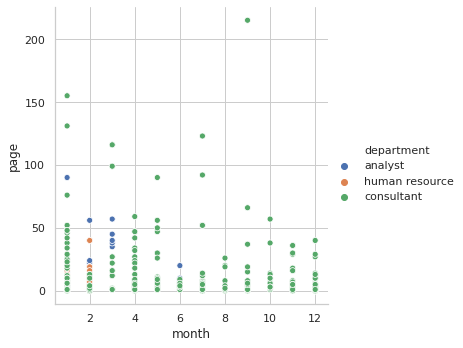

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scatter_line_plot import sns_relplot

sns_relplot(data=df, x="month", y="page",hue="department")

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:1656: UserWarning: relplot is a figure-level function and does not accept target axes. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


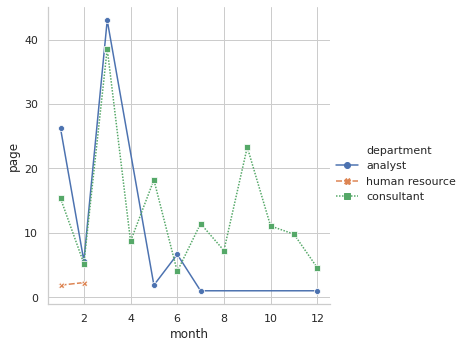

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scatter_line_plot import sns_relplot

sns_relplot(data=df, x="month", y="page", kind="line", hue="department",
             style='department', markers=True)

## 5. Cat x Cont Barplot